In [2]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [8]:
US = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/USArrests.csv')

US.columns = ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']

US

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [9]:
labelList=US['State'].tolist()
labelList

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [15]:
single = linkage(US.iloc[:, 1:], metric='euclidean', method='single')
single

array([[14.        , 28.        ,  2.29128785,  2.        ],
       [16.        , 25.        ,  3.8340579 ,  2.        ],
       [13.        , 15.        ,  3.92937654,  2.        ],
       [12.        , 31.        ,  6.23698645,  2.        ],
       [34.        , 43.        ,  6.63777071,  2.        ],
       [35.        , 45.        ,  7.35527022,  2.        ],
       [49.        , 55.        ,  7.93095202,  3.        ],
       [ 6.        , 37.        ,  8.0274529 ,  2.        ],
       [18.        , 40.        ,  8.53756406,  2.        ],
       [47.        , 58.        ,  8.76698352,  3.        ],
       [48.        , 50.        ,  9.50841732,  3.        ],
       [46.        , 56.        , 10.30533842,  4.        ],
       [36.        , 61.        , 10.57922492,  5.        ],
       [52.        , 54.        , 10.92016483,  4.        ],
       [26.        , 57.        , 11.070682  ,  3.        ],
       [63.        , 64.        , 11.25610945,  7.        ],
       [20.        , 29.

In [16]:
import matplotlib.pyplot as plt

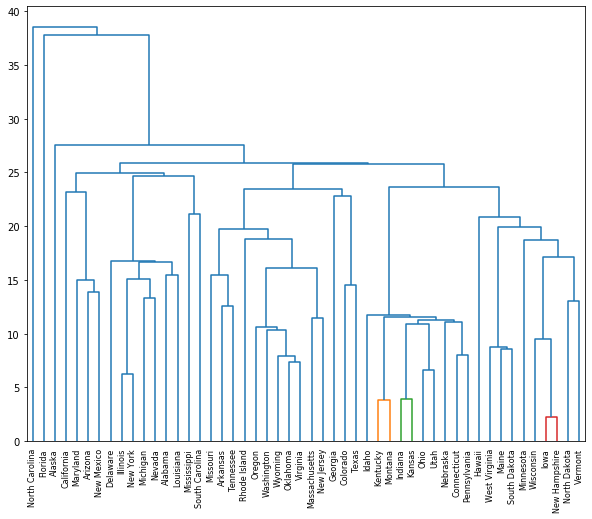

In [49]:
plt.figure(figsize=(10,8))

dendrogram(single, labels=labelList, orientation='top', color_threshold=5, distance_sort='ascending')

#plt.axhline(y=25, color='r', linewidth=1)
plt.show()

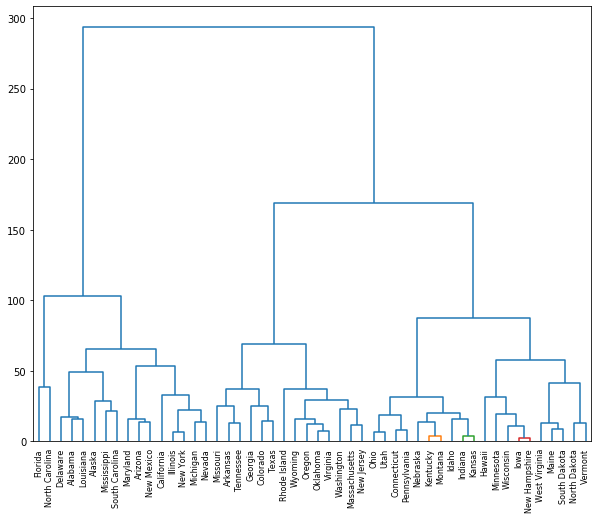

In [48]:
complete= linkage(US.iloc[:, 1:], metric='euclidean', method='complete')

plt.figure(figsize=(10,8))

dendrogram(complete, labels=labelList, orientation='top', color_threshold=5, distance_sort='ascending')

#plt.axhline(y=25, color='r', linewidth=1)
plt.show()

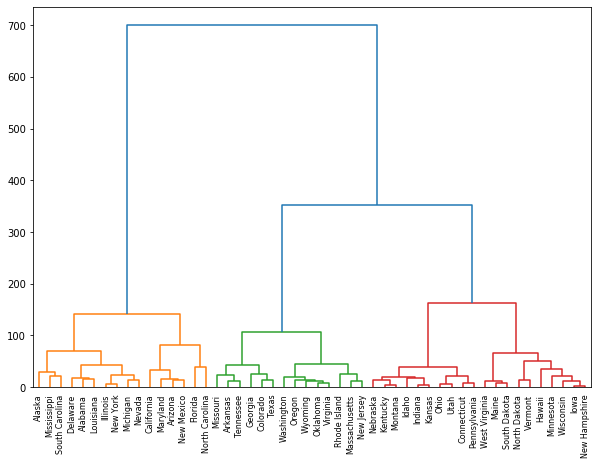

In [44]:
ward = linkage(US.iloc[:, 1::], metric ='euclidean', method='ward')
# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(ward,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            color_threshold=250,
            show_leaf_counts=True)
#plt.axhline(y=250, color='r', linewidth=1)  #Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()

In [46]:
assignments = fcluster(ward, 250, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [47]:
US['cluster'] = assignments
US.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


In [51]:
from sklearn.cluster import KMeans

In [54]:
iris = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv')

X = iris.iloc[:,:-1]
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [55]:
from sklearn.metrics import calinski_harabasz_score

In [57]:
for k in range(2,10):
    clf = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = clf.labels_
    print(k, calinski_harabasz_score(X,labels))

2 513.3038433517568
3 560.3999242466402
4 529.1207190840455
5 494.0943819140986
6 474.51742958716295
7 448.8714494416451
8 436.61302488142496
9 414.5303174051382


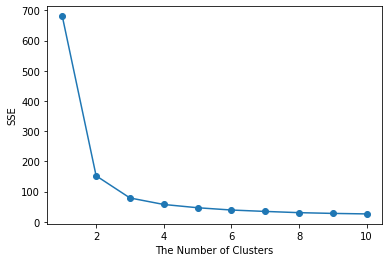

[680.8244, 152.36870647733906, 78.94084142614602, 57.345409315718165, 46.53558205128205, 38.95701115711985, 34.32652991452992, 30.227724598930486, 27.766706937799047, 26.07225182334006]


In [60]:
def elbow(X):
    sse = []
    for k in range(1,11):
        clf=KMeans(n_clusters=k, random_state=1).fit(X)
        sse.append(clf.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel("The Number of Clusters")
    plt.ylabel("SSE")
    plt.show()
    print(sse)
    
elbow(X)

In [63]:
from sklearn.metrics import silhouette_score

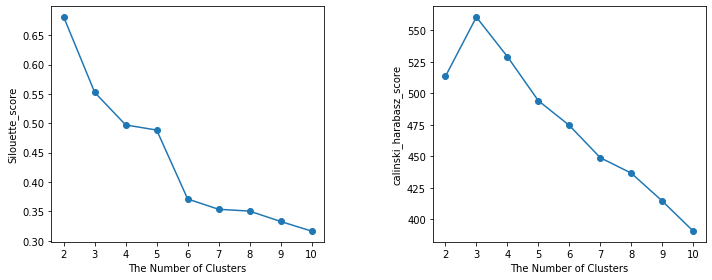

In [82]:
def get_cluster_score(X):
    sil_score = []
    ch_score = []
    for k in range(2,11):
        clf=KMeans(n_clusters=k, random_state=1).fit(X)
        sil_score.append(silhouette_score(X, clf.labels_))
        ch_score.append(calinski_harabasz_score(X, clf.labels_))
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    axes[0].plot(range(2,11), sil_score, marker='o')
    axes[0].set_xlabel("The Number of Clusters")
    axes[0].set_ylabel("Silouette_score")
    
    axes[1].plot(range(2,11), ch_score, marker='o')
    axes[1].set_xlabel("The Number of Clusters")
    axes[1].set_ylabel("calinski_harabasz_score")
    
    plt.tight_layout()
    fig.subplots_adjust(wspace=0.4)
    plt.show()
    
get_cluster_score(X)





In [84]:
clf = KMeans(n_clusters=3, random_state=1)
clf.fit(X)

iris['cluster'] = clf.labels_

iris.groupby('cluster').mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


In [85]:
import seaborn as sns


C:\Users\rkddn\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


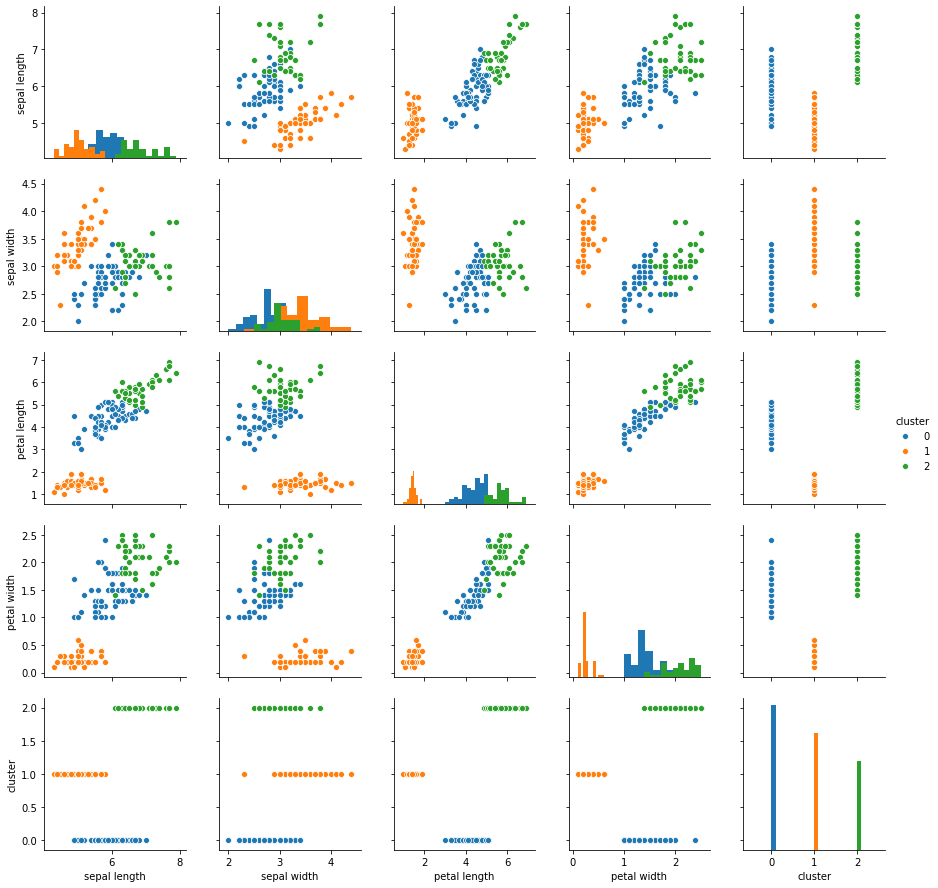

In [95]:
sns.pairplot(iris, diag_kind='hist',hue='cluster')
plt.show()

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [97]:
iris = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv')
iris

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [109]:
df = iris.drop(columns='target')
df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [110]:
ssScaler = StandardScaler()

In [111]:
df_scaled = pd.DataFrame(ssScaler.fit_transform(df), columns=df.columns)
df_scaled 

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [112]:
clf = GaussianMixture(n_components=3).fit(df_scaled)
df['cluster']= clf.predict(df_scaled)
df

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [113]:
df.groupby('cluster').mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,6.554545,2.950909,5.489091,1.989091
1,5.006000,3.418000,1.464000,0.244000
2,5.904444,2.775556,4.193333,1.293333


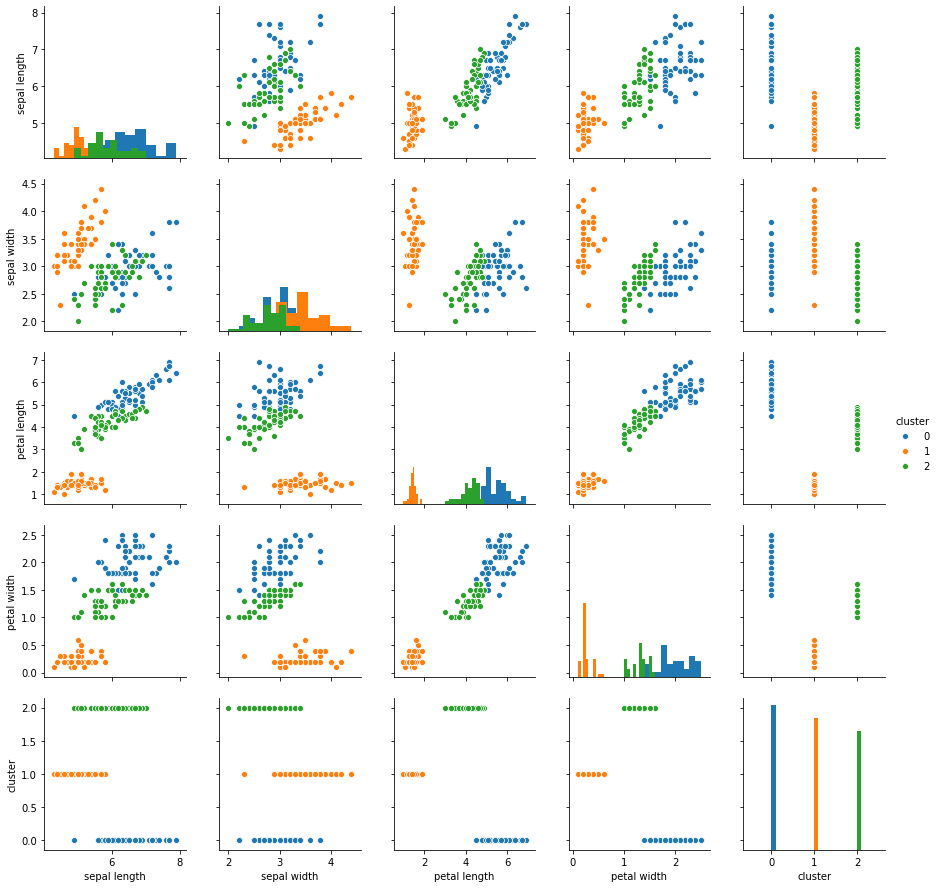

In [115]:
sns.pairplot(df, hue='cluster', diag_kind='hist')


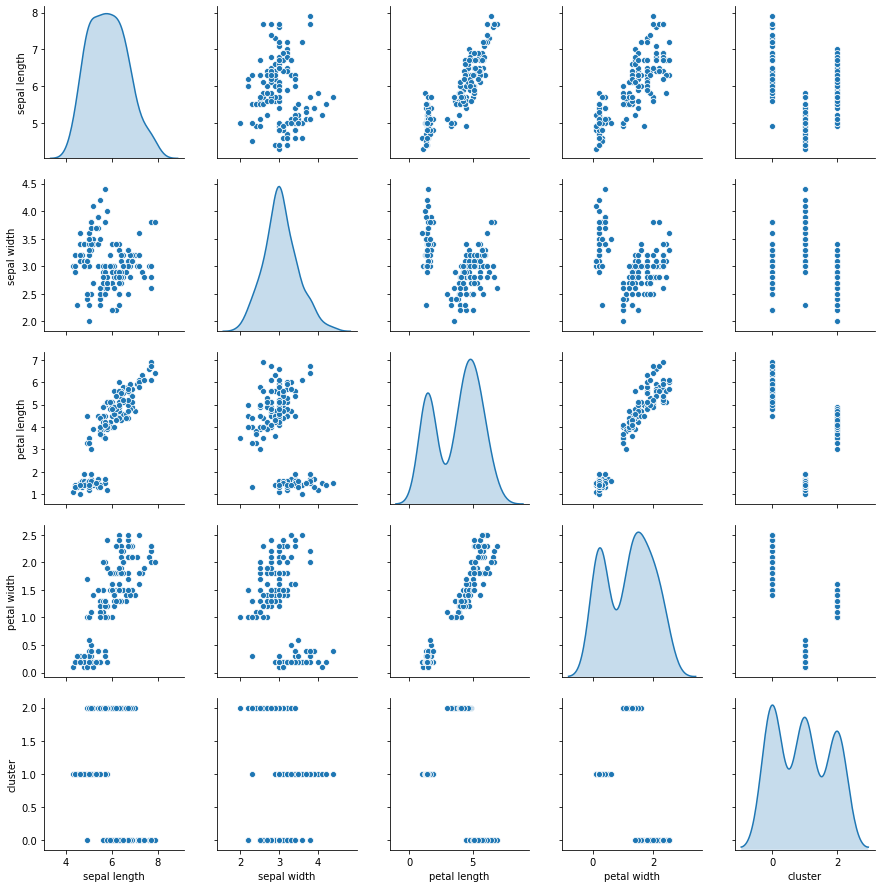

In [117]:
sns.pairplot(df, diag_kind='kde')
